In [98]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp

In [99]:
#Load data
g_jazz = nx.read_gml("data/graph_jazz_collab.gml")
g_polblog = nx.read_gml("data/graph_polblog.gml")
g_terrorists = nx.read_gml("data/graph_terrorists.gml")

In [100]:
#A03.1 Centrality correlations
#1. The degree 𝑘𝑖, closeness 𝑐𝑖, betweenness 𝑏𝑖 and eigenvector 𝑒𝑖 centrality
#2. Then do a scatter plot for each pair of centralities (6 plots total)
#3. Compute Pearson’s, Spearman’s and Kendall’s correlation coefficients 
#   for each pair and note them on the scatter plots;
from cProfile import label


def plot(x, y, label1, label2):
    a = np.array([x[i] for i in x])
    b = np.array([y[j] for j in y])

    #Compute 3 correlations
    pearson = sp.pearsonr(a, b)[0]
    spearman = sp.spearmanr(a, b)[0]
    kendall = sp.kendalltau(a, b)[0]

    #plot
    plt.scatter(x.values(), y.values())
    plt.xlabel(label1)
    plt.ylabel(label2)
    plt.title(label1 + "-" + label2)
    plt.text(max(x.values())+0.03, max(y.values()), "Pearson: " + str(pearson))
    plt.text(max(x.values())+0.03, max(y.values())-0.02, "Spearman: " + str(spearman))
    plt.text(max(x.values())+0.03, max(y.values())-0.04, "Kendall: " + str(kendall))
    plt.show()

def centrality_correlation(graph, label1, label2):
    #Compute for 4 centralities 
    deg_cen, close_cen, bet_cen, eigen_cen = get_cen(graph)

    #Plot
    if label1 == "degree" and label2 == "closeness":
        plot(deg_cen, close_cen, label1, label2)
    elif label1 == "degree" and label2 == "betweeness":
        plot(deg_cen, bet_cen, label1, label2)
    elif label1 == "degree" and label2 == "eigenvector":
        plot(deg_cen, eigen_cen, label1, label2)
    elif label1 == "closeness" and label2 == "betweeness":
        plot(close_cen, bet_cen, label1, label2)
    elif label1 == "closeness" and label2 == "eigenvector":
        plot(close_cen, eigen_cen, label1, label2)
    elif label1 == "betweeness" and label2 == "eigenvector":
        plot(bet_cen, eigen_cen, label1, label2)

def get_cen(graph):
    deg_cen = nx.degree_centrality(graph)
    close_cen = nx.closeness_centrality(graph)
    bet_cen = nx.betweenness_centrality(graph)
    eigen_cen = nx.eigenvector_centrality(graph)
    return deg_cen,close_cen,bet_cen,eigen_cen

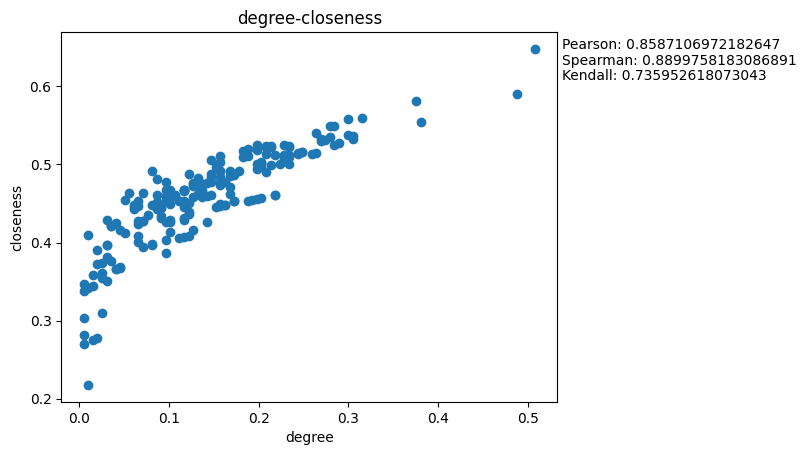

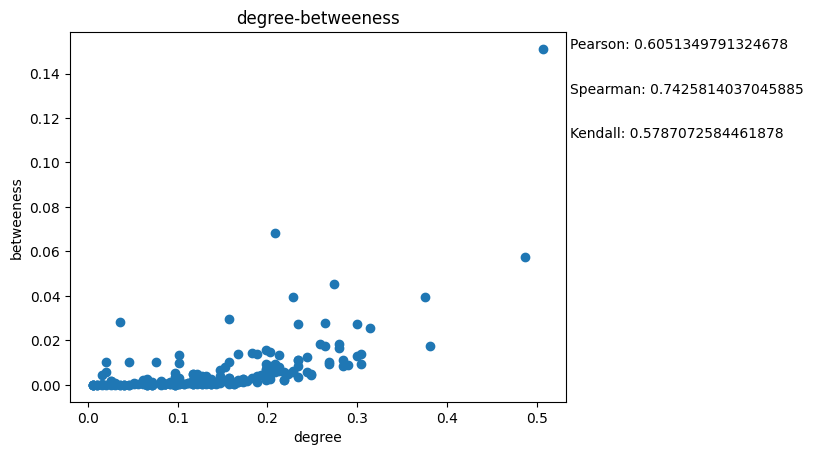

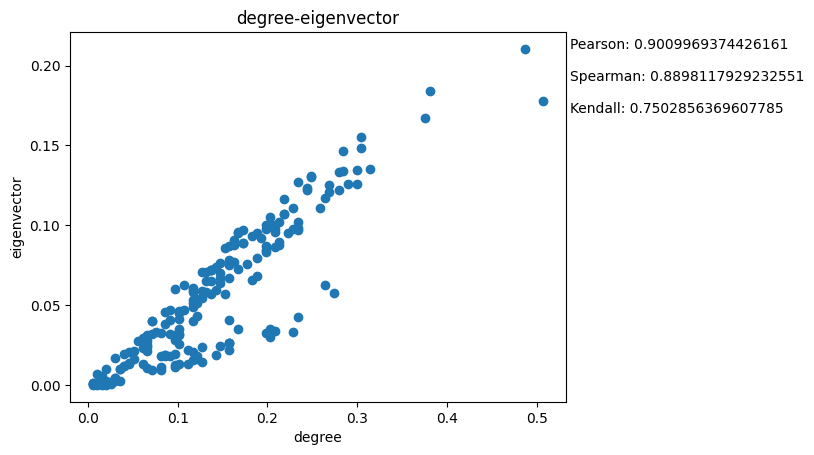

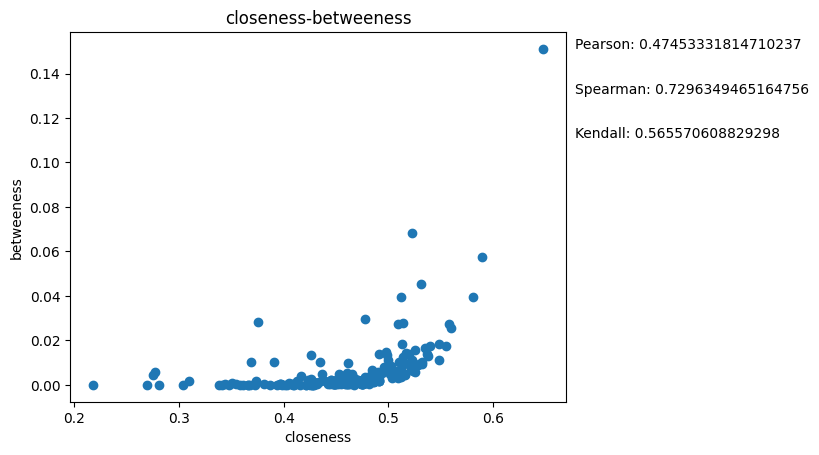

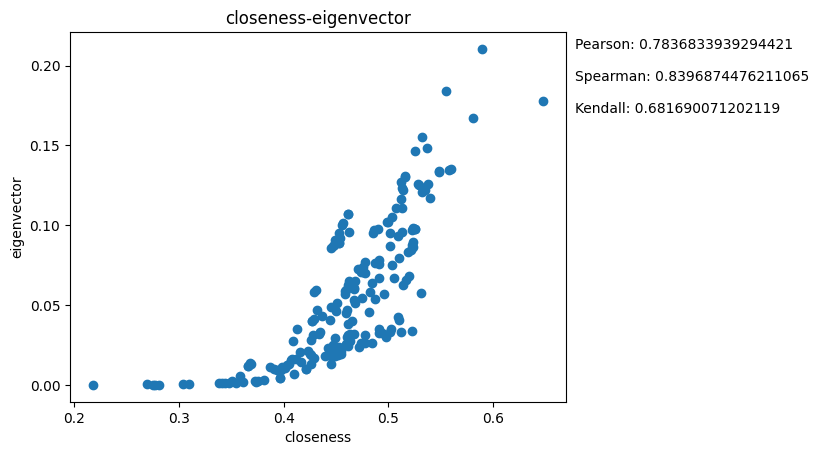

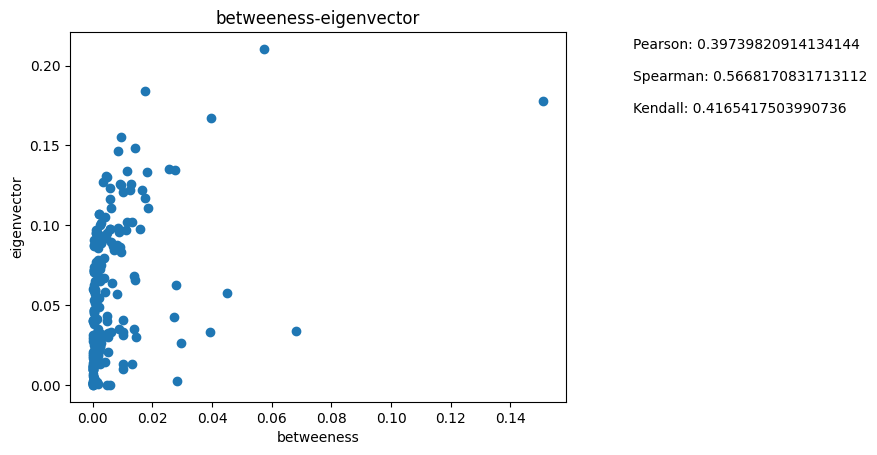

In [101]:
#Dataset_Jazz
centrality_correlation(g_jazz, "degree", "closeness")
centrality_correlation(g_jazz, "degree", "betweeness")
centrality_correlation(g_jazz, "degree", "eigenvector")
centrality_correlation(g_jazz, "closeness", "betweeness")
centrality_correlation(g_jazz, "closeness", "eigenvector")
centrality_correlation(g_jazz, "betweeness", "eigenvector")

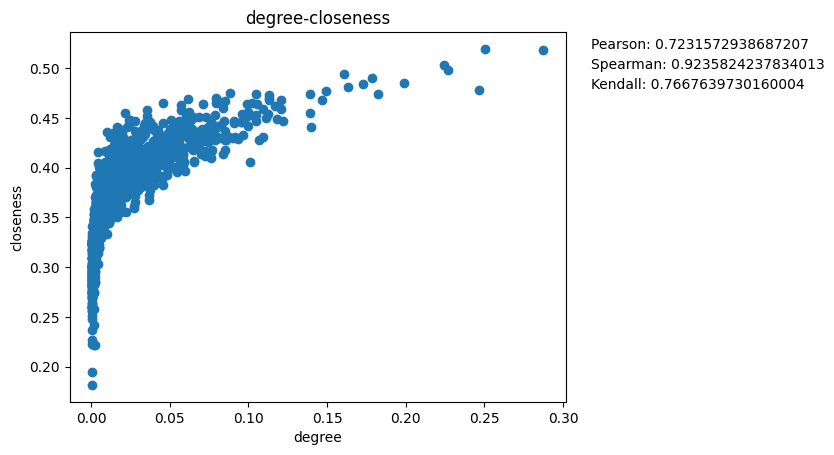

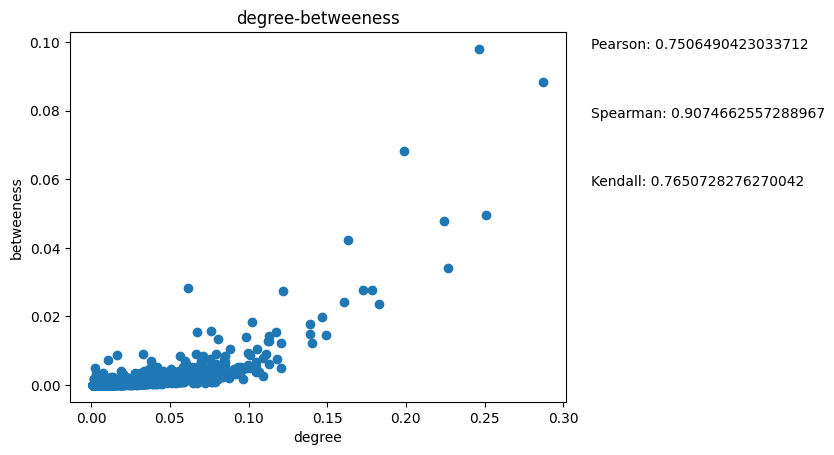

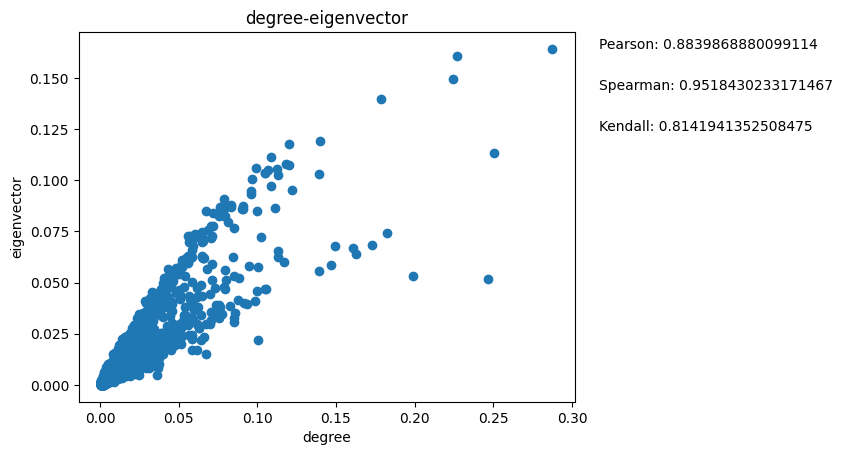

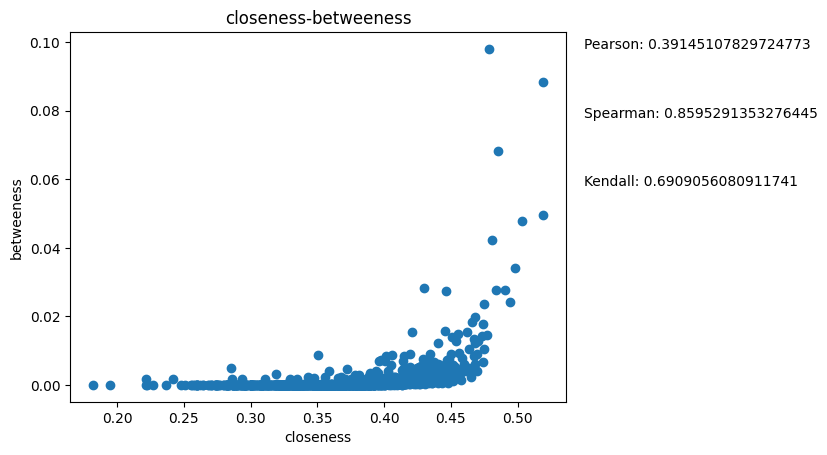

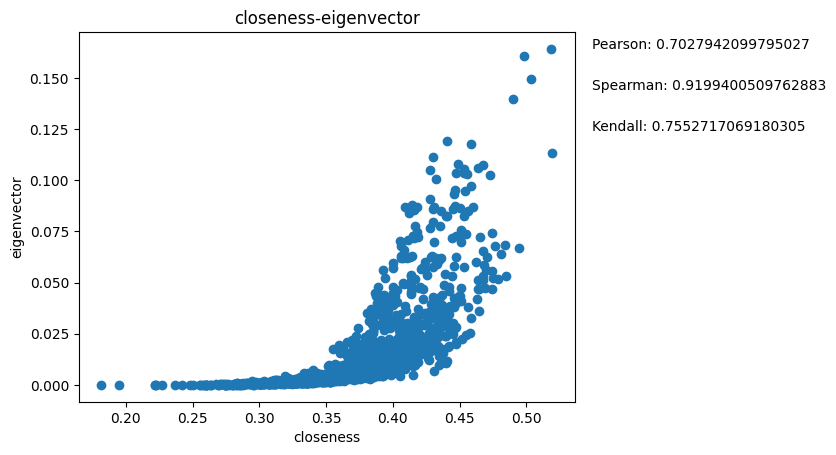

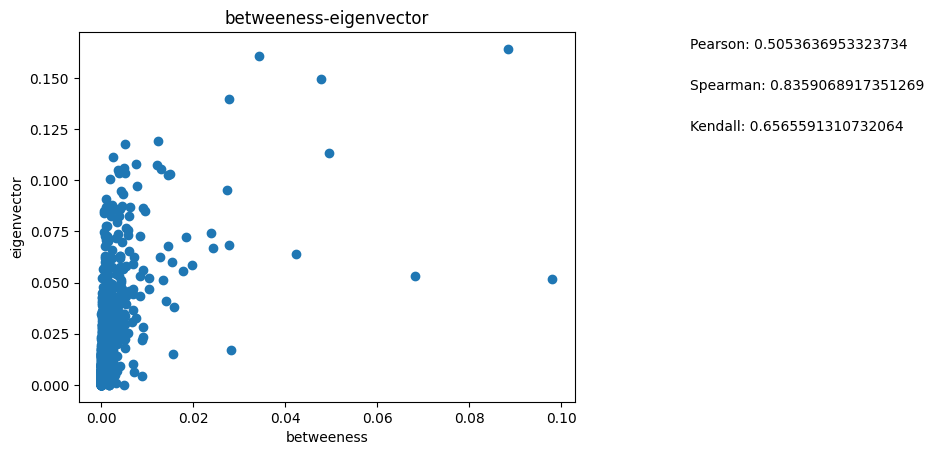

In [102]:
#Dataset_polblog
centrality_correlation(g_polblog, "degree", "closeness")
centrality_correlation(g_polblog, "degree", "betweeness")
centrality_correlation(g_polblog, "degree", "eigenvector")
centrality_correlation(g_polblog, "closeness", "betweeness")
centrality_correlation(g_polblog, "closeness", "eigenvector")
centrality_correlation(g_polblog, "betweeness", "eigenvector")

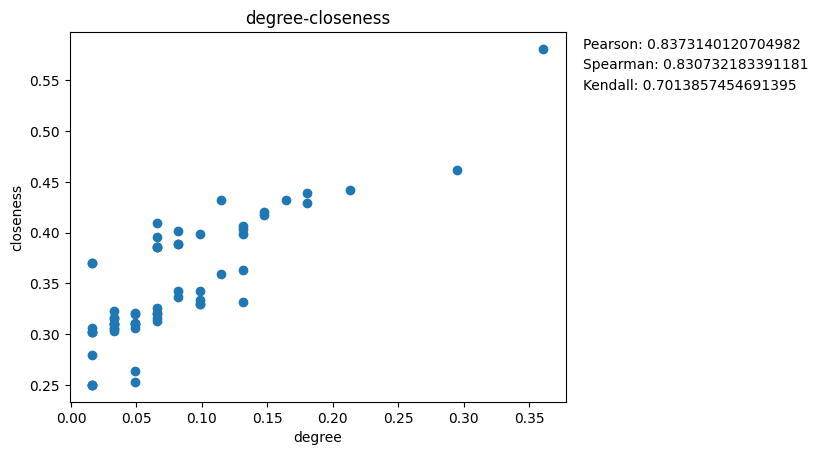

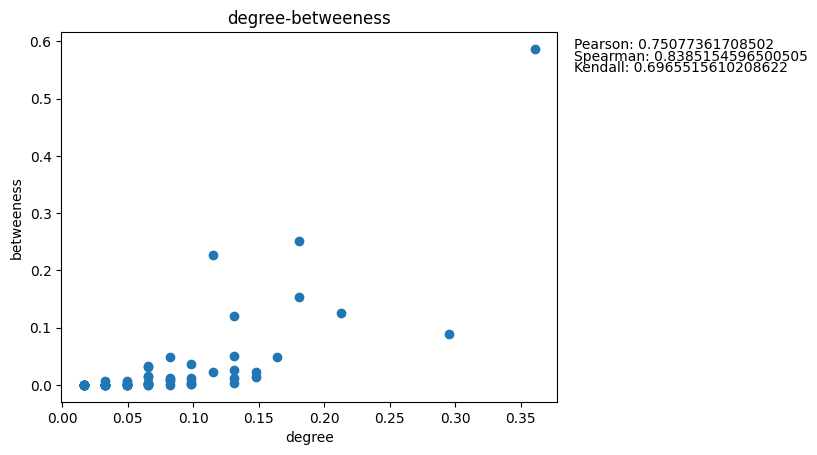

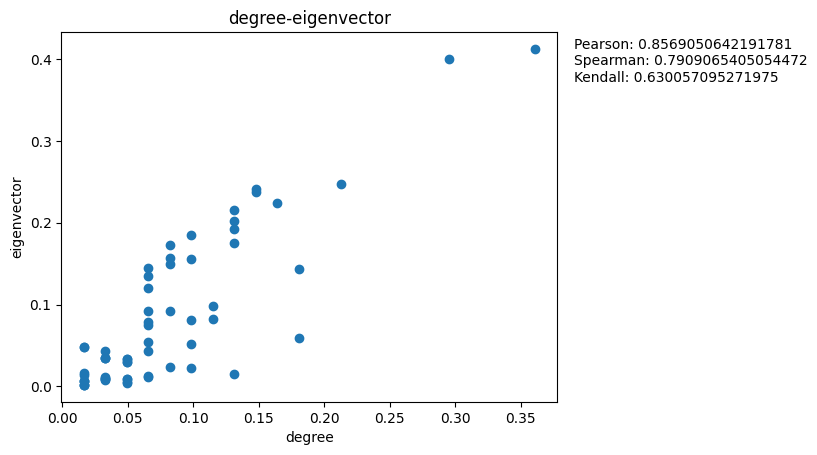

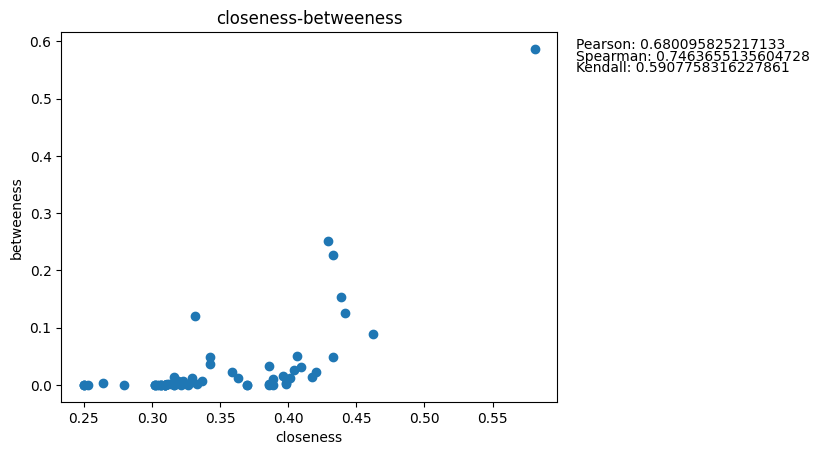

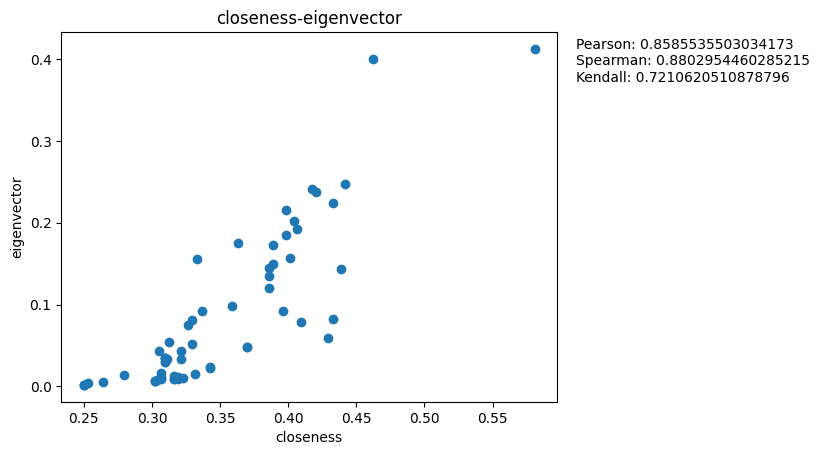

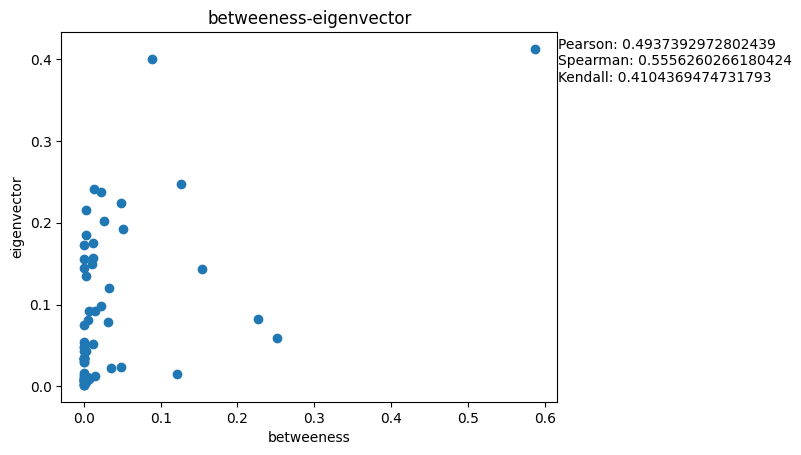

In [103]:
#Dataset_terrorists
centrality_correlation(g_terrorists, "degree", "closeness")
centrality_correlation(g_terrorists, "degree", "betweeness")
centrality_correlation(g_terrorists, "degree", "eigenvector")
centrality_correlation(g_terrorists, "closeness", "betweeness")
centrality_correlation(g_terrorists, "closeness", "eigenvector")
centrality_correlation(g_terrorists, "betweeness", "eigenvector")

Q: Briefly explain, for the Jazz collaborations data, what each of
the centrality measures means in practice.

A:
#Degree Centrality

This centrality describes how much nodes linked to one node. Here it can show how many collaborations each musician has and which musicians has the most collaborations with others (popularity).

#Closeness Centrality

This centrality describes how short from one node to others. In the example of Jazz collaborations, it can show how easy a musician can collaborate with others. 

#Betweeness Centrality

This centrality describes how many paths/routes go through one node. Here can show the importance of a musician in establishing relationships/collaborations. The higher betweeness centrality of a musican (let's call him/her A), the higher chances two unlinked musicans establish the collabroation (have a path) through A.

#Eigenvector Centrality

This centrality determines if one node is linked important nodes. Higher eigenvector centrality suggests a musician has more collaborations with other important musicians (has more important neighbors). 


In [104]:
#A03.2 Centrality and randomisation
#1. For each dataset 𝒢, randomise it to obtain a network 𝒢𝑟𝑛�
grnd_jazz = nx.algorithms.smallworld.random_reference(g_jazz,niter = 20, connectivity=False)
grnd_polblog = nx.algorithms.smallworld.random_reference(g_polblog,niter = 20, connectivity=False)
grnd_terrorists = nx.algorithms.smallworld.random_reference(g_terrorists,niter = 20, connectivity=False)

In [105]:
#2. Do a scatter plot of each centrality before vs. after randomisation (e.g. 𝑘𝑟𝑛𝑑𝑖 vs 𝑘𝑖) 
# and compute the corresponding correlation coefficient.
def cmp_cen(g, grnd, cen_type):
    deg_cen, close_cen, bet_cen, eigen_cen = get_cen(g)
    deg_cen_rnd, close_cen_rnd, bet_cen_rnd, eigen_cen_rnd = get_cen(grnd)

    if cen_type == "degree":
        plot(deg_cen, deg_cen_rnd, "Degree[Normal]", "Degree[Random]")
    elif cen_type == "closeness":
        plot(close_cen, close_cen_rnd, "Closeness[Normal]", "Closeness[Random]")
    elif cen_type == "betweeness":
        plot(bet_cen, bet_cen_rnd, "Betweeness[Normal]", "Betweeness[Random]")
    elif cen_type == "eigenvector":
        plot(eigen_cen, eigen_cen_rnd, "Eigenvector[Normal]", "Eigenvector[Random]")

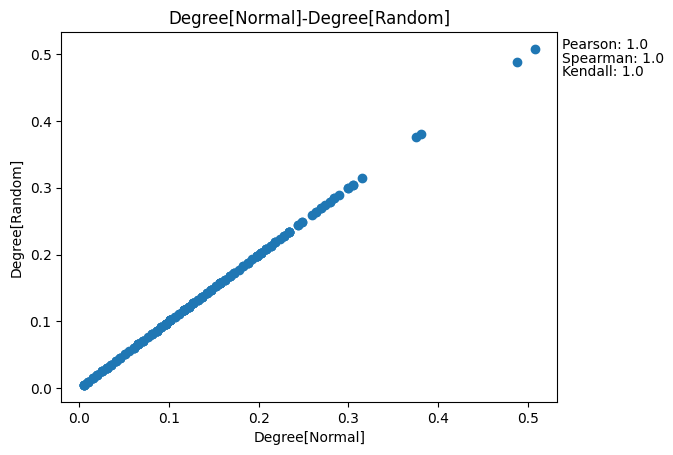

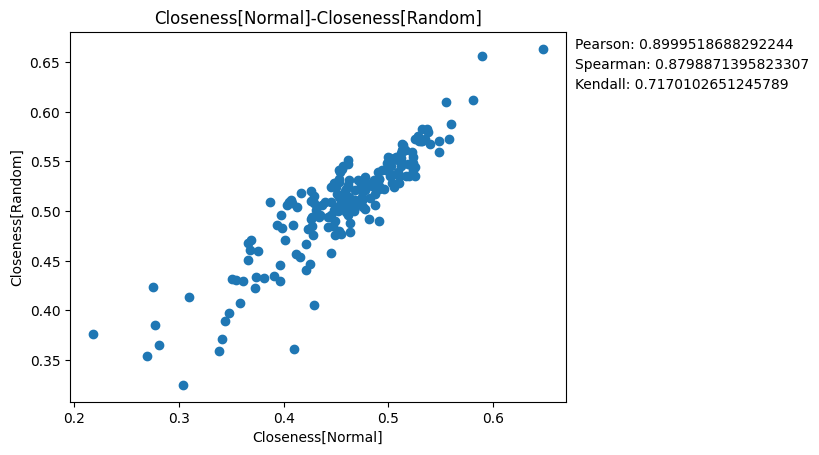

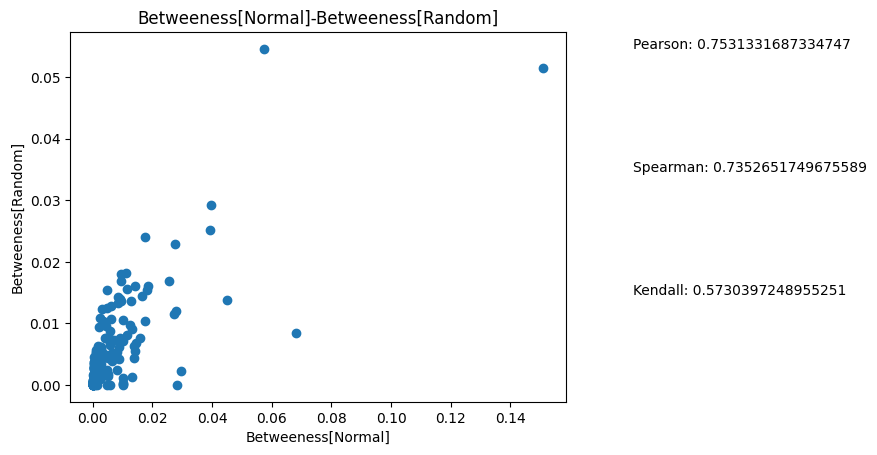

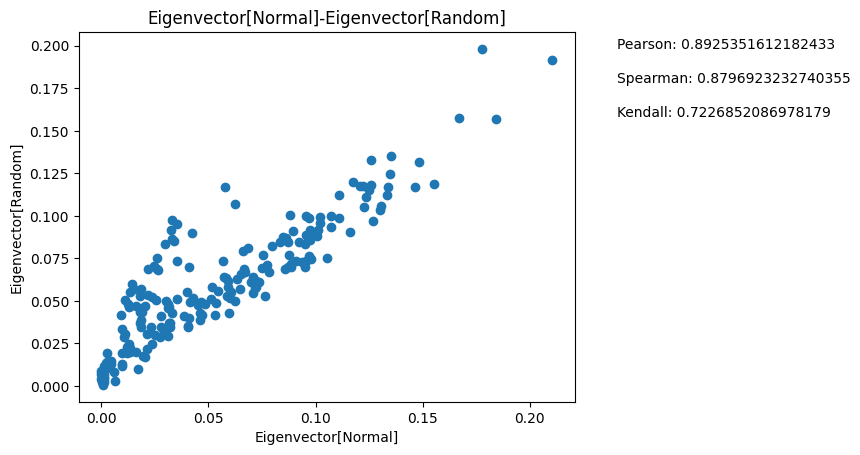

In [106]:
#Jazz
cmp_cen(g_jazz, grnd_jazz, "degree")
cmp_cen(g_jazz, grnd_jazz, "closeness")
cmp_cen(g_jazz, grnd_jazz, "betweeness")
cmp_cen(g_jazz, grnd_jazz, "eigenvector")

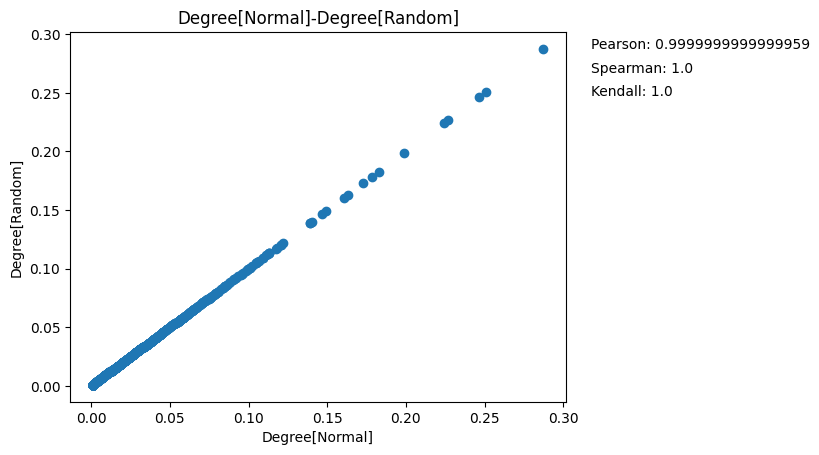

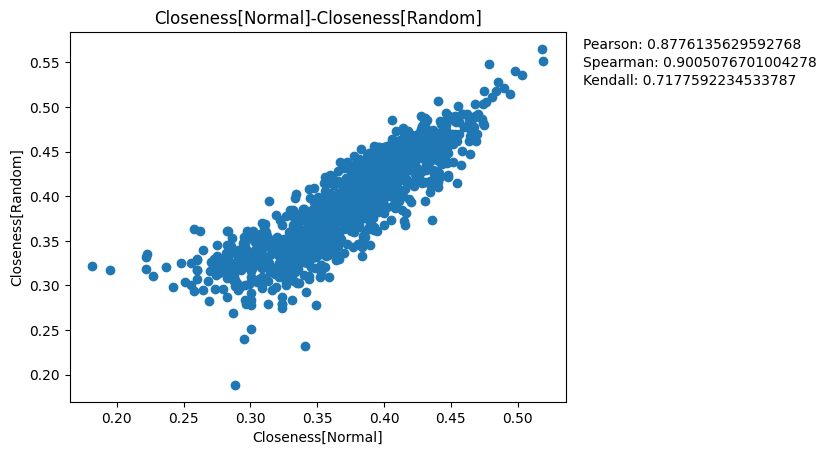

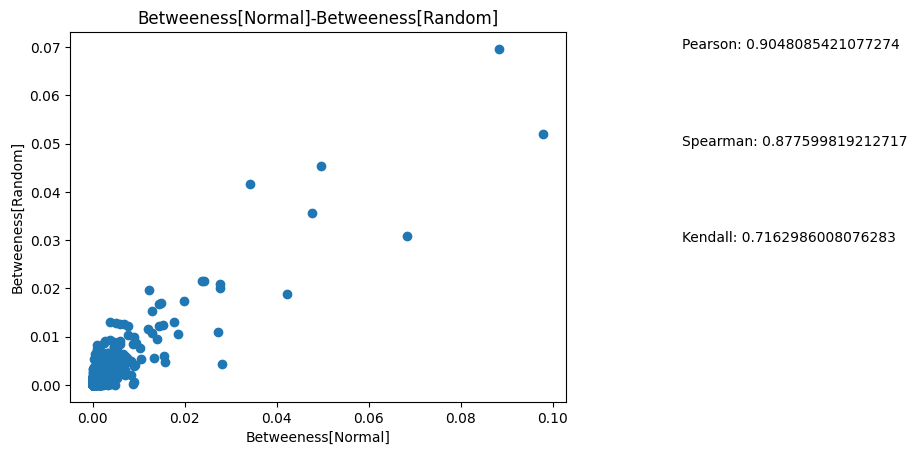

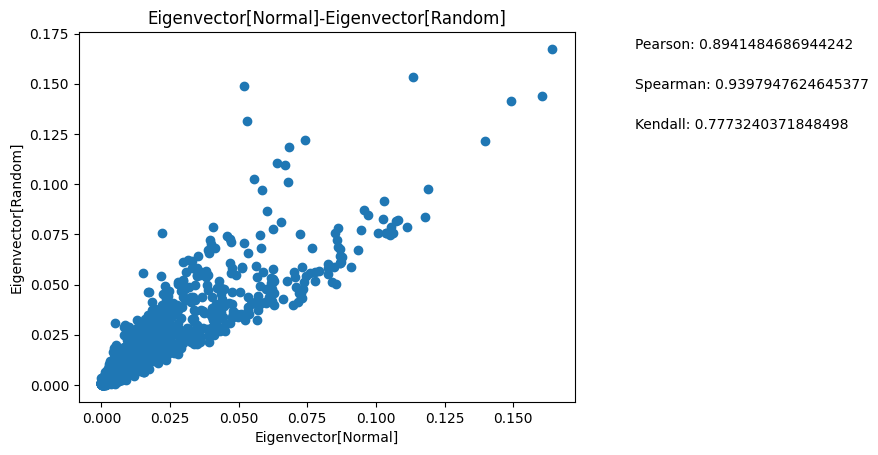

In [107]:
#Polblog
cmp_cen(g_polblog, grnd_polblog, "degree")
cmp_cen(g_polblog, grnd_polblog, "closeness")
cmp_cen(g_polblog, grnd_polblog, "betweeness")
cmp_cen(g_polblog, grnd_polblog, "eigenvector")

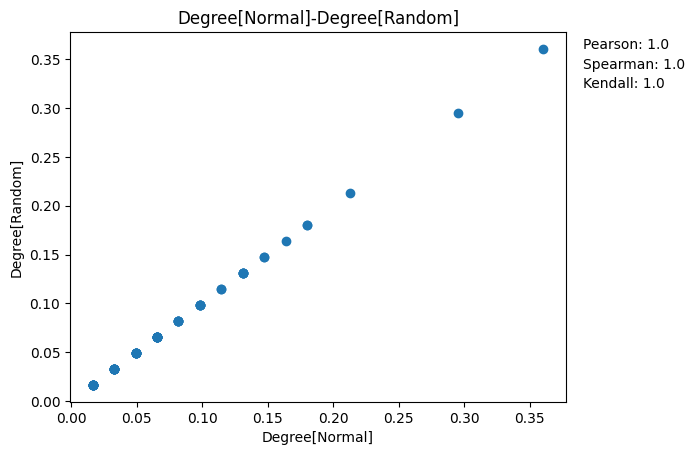

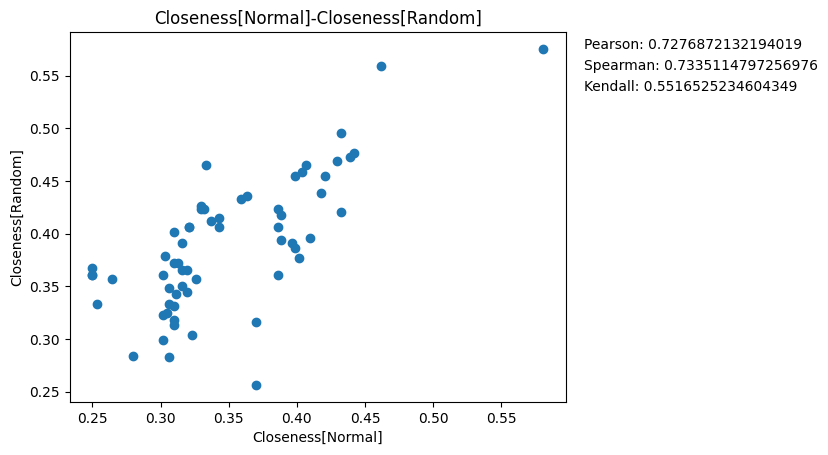

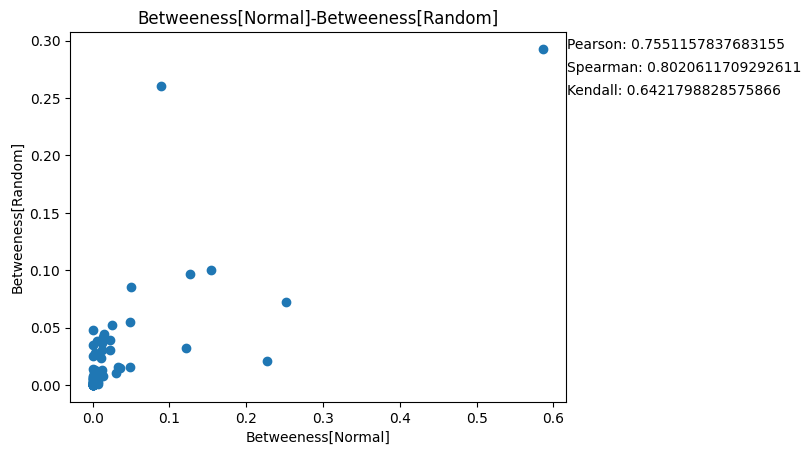

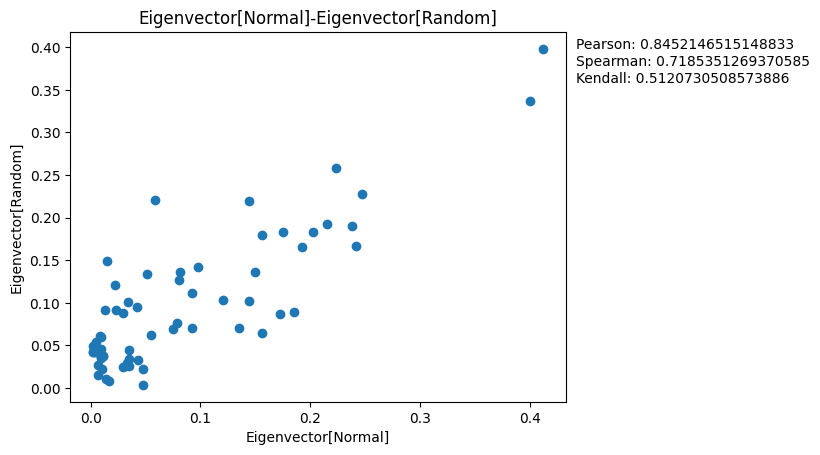

In [108]:
#Terrorists
cmp_cen(g_terrorists, grnd_terrorists, "degree")
cmp_cen(g_terrorists, grnd_terrorists, "closeness")
cmp_cen(g_terrorists, grnd_terrorists, "betweeness")
cmp_cen(g_terrorists, grnd_terrorists, "eigenvector")

Q: Why do you get that result for degree centrality?

A: Since degree centrality is only about how much nodes or links a node connects to. Thus, randomize the network will not change the number of links of a node and have no effects on degree centrality. It's why the result of coefficients show 1 and appear as y=x in the scatterplot.

Text(0.5, 1.0, ' Spearman’s rank correlation p between the PageRanks for a0 = 0.85 and all other alphas')

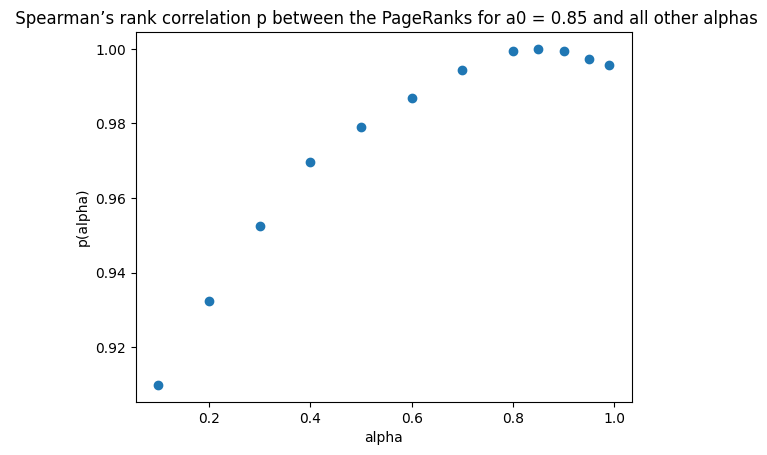

In [109]:
#A03.3 Page Rank
florida = nx.read_graphml("data/Florida_foodweb.graphml")
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 0.99]

pr85 = [i for i in nx.pagerank(florida, alpha = 0.85).values()]

spearman = []
for a in alpha:
    pr = [i for i in nx.pagerank(florida, alpha = a).values()]
    spearman.append(sp.spearmanr(pr85, pr)[0])

plt.scatter(alpha, spearman)
plt.xlabel("alpha")
plt.ylabel("p(alpha)")
plt.title(" Spearman’s rank correlation p between the PageRanks for a0 = 0.85 and all other alphas")
